In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h2>About the dataset columns</h2>
<ul>
    <li>
UPI Banks - 
upi app name
    </li>
<li>Volume (Mn) By Costumers - 
volume of transactions</li>
<li>Value (Cr) by Costumers - 
value of transactions</li>
<li>Volume (Mn) - 
total volume of transactions</li>

<li>Value (Cr) - 
total value of transactions</li>
<li>Month - 
month</li>
<li>Year - 
year</li>
    <ul>

# import the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [6]:
data = pd.read_csv(r"C:\Users\29IN\Desktop\Python project\UPI apps transaction data in 2021.csv")

In [7]:
data.head().style.set_properties(**{"background-color": "#ff4654","color": "black","border-color": "black"}) #Print the first 5 rows

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,9.040000,2248.490000,15.120000,5732.090000,12,2021
1,Airtel Payments Bank Apps,8.410000,1923.950000,15.900000,5554.630000,11,2021
2,Airtel Payments Bank Apps,7.600000,1491.340000,14.310000,4746.790000,10,2021
3,Airtel Payments Bank Apps,6.910000,1520.920000,11.520000,3759.120000,9,2021
4,Airtel Payments Bank Apps,6.140000,1396.650000,9.310000,2941.880000,8,2021


In [8]:
data.shape #Dataset has 654 rows with 7 columns

(654, 7)

In [9]:
data.info() #Information about dataset's columns, like data types and non-null values count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UPI Banks                 654 non-null    object 
 1   Volume (Mn) By Costumers  654 non-null    float64
 2   Value (Cr) by Costumers   654 non-null    float64
 3   Volume (Mn)               654 non-null    float64
 4   Value (Cr)                654 non-null    float64
 5   Month                     654 non-null    int64  
 6   Year                      654 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 35.9+ KB


# Duplicates rows check

In [10]:
data.duplicated().any()

False

# Null values check

In [11]:
data.isnull().sum()

UPI Banks                   0
Volume (Mn) By Costumers    0
Value (Cr) by Costumers     0
Volume (Mn)                 0
Value (Cr)                  0
Month                       0
Year                        0
dtype: int64

In [12]:
data.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,12,2021
1,Airtel Payments Bank Apps,8.41,1923.95,15.90,5554.63,11,2021
2,Airtel Payments Bank Apps,7.60,1491.34,14.31,4746.79,10,2021
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,9,2021
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,8,2021


In [13]:
data['Year'].value_counts() # here we can see there is only one unique value in "Year" column so not use full for draw insights, we can drop "Year" column

2021    654
Name: Year, dtype: int64

In [14]:
data['UPI Banks'].value_counts() # Display the different types of UPI Banks payment using for Transaction.

Airtel Payments Bank Apps     12
Mobikwik                      12
ICICI Bank Apps               12
IDBI Bank App                 12
IDFC Bank App                 12
                              ..
Goibibo                        1
Andhra Bank App                1
Jammu and Kashmir Bank App     1
Khalijeb                       1
Other Bank Apps                1
Name: UPI Banks, Length: 69, dtype: int64

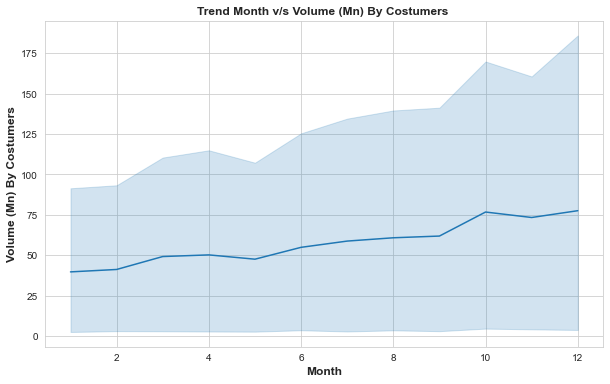

In [15]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.lineplot(x='Month',y='Volume (Mn) By Costumers',data=data)
plt.xlabel('Month',fontweight='bold',size = 12) 
plt.ylabel('Volume (Mn) By Costumers',fontweight='bold',size = 12) 
plt.title("Trend Month v/s Volume (Mn) By Costumers ",fontweight='bold',size = 12)
plt.show()

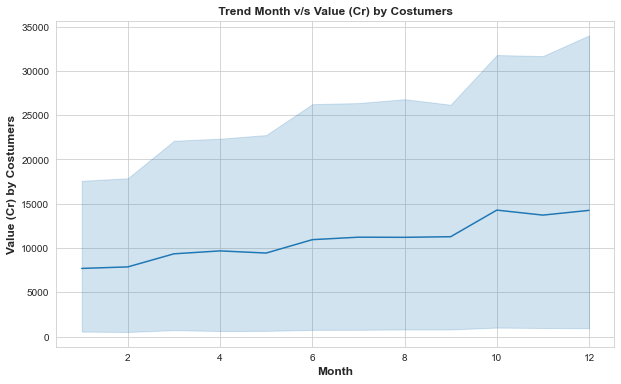

In [16]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Month",y='Value (Cr) by Costumers',data=data)
plt.xlabel('Month',fontweight='bold',size = 12) 
plt.ylabel('Value (Cr) by Costumers',fontweight='bold',size = 12) 
plt.title(" Trend Month v/s Value (Cr) by Costumers ",fontweight='bold',size = 12)
plt.show()

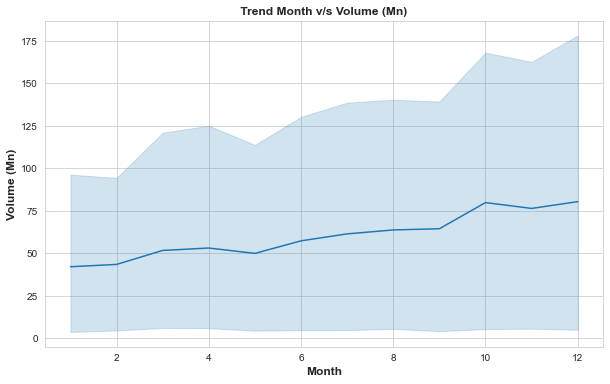

In [17]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Month",y='Volume (Mn)',data=data)
plt.xlabel('Month',fontweight='bold',size = 12) 
plt.ylabel('Volume (Mn)',fontweight='bold',size = 12) 
plt.title(" Trend Month v/s Volume (Mn) ",fontweight='bold',size = 12)
plt.show()

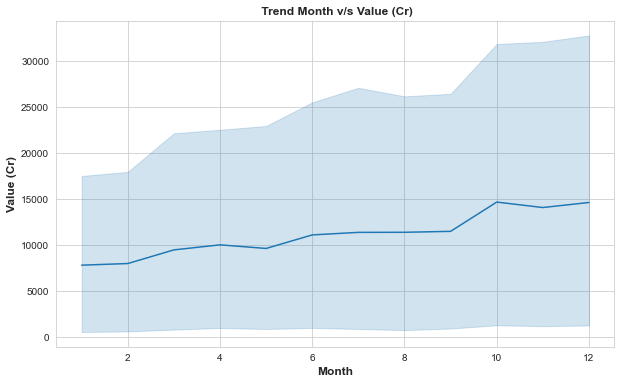

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Month",y='Value (Cr)',data=data)
plt.xlabel('Month',fontweight='bold',size = 12) 
plt.ylabel('Value (Cr)',fontweight='bold',size = 12) 
plt.title(" Trend Month v/s Value (Cr)",fontweight='bold',size = 12)
plt.show()

# Top 10 highest volume payment by UPI Banks

# Volume (Mn) By Costumers

In [19]:
total = data.groupby(['UPI Banks']).agg({'Volume (Mn) By Costumers':'sum'}).reset_index()

In [20]:
top_10_highest_volume_mn = total.sort_values(by = 'Volume (Mn) By Costumers',ascending = False)

In [21]:
top_10_highest_volume_mn.head(10)

,UPI Banks,Volume (Mn) By Costumers
51,PhonePe,17470.81
26,Google Pay,13541.88
50,Paytm Payments Bank App,4827.38
3,Amazon Pay,704.15
67,Yes Bank Apps,292.50
6,BHIM,289.43
29,ICICI Bank Apps,191.06
5,Axis Bank Apps,99.57
16,Cred,80.96
1,Airtel Payments Bank Apps,67.37


# Value (Cr) by Costumers

In [22]:
total = data.groupby(['UPI Banks']).agg({'Value (Cr) by Costumers':'sum'}).reset_index()
top_10_highest_volume_cr = total.sort_values(by = 'Value (Cr) by Costumers',ascending = False)

In [23]:
top_10_highest_volume_cr.head(10)

,UPI Banks,Value (Cr) by Costumers
51,PhonePe,3365727.16
26,Google Pay,2737496.81
50,Paytm Payments Bank App,573899.84
16,Cred,97013.60
6,BHIM,91106.89
67,Yes Bank Apps,61298.95
3,Amazon Pay,60962.34
29,ICICI Bank Apps,60568.91
60,State Bank of India Apps,25357.37
1,Airtel Payments Bank Apps,13317.81


# Volume (Mn)

In [24]:
total = data.groupby(['UPI Banks']).agg({'Volume (Mn)':'sum'}).reset_index()
top_10_highest_volume_Mn = total.sort_values(by = 'Volume (Mn)',ascending = False)

In [25]:
top_10_highest_volume_Mn.head(10)

,UPI Banks,Volume (Mn)
51,PhonePe,17470.81
26,Google Pay,13541.88
50,Paytm Payments Bank App,5640.23
5,Axis Bank Apps,841.62
3,Amazon Pay,704.15
67,Yes Bank Apps,293.08
6,BHIM,289.43
29,ICICI Bank Apps,227.74
1,Airtel Payments Bank Apps,109.80
16,Cred,80.96


# Value (Cr)

In [26]:
total = data.groupby(['UPI Banks']).agg({'Value (Cr)':'sum'}).reset_index()
top_10_highest_volume_Cr = total.sort_values(by = 'Value (Cr)',ascending = False)

In [27]:
top_10_highest_volume_Cr.head(10)

,UPI Banks,Value (Cr)
51,PhonePe,3365727.06
26,Google Pay,2737496.81
50,Paytm Payments Bank App,669189.79
16,Cred,97013.60
6,BHIM,91106.89
29,ICICI Bank Apps,62297.95
67,Yes Bank Apps,61299.32
3,Amazon Pay,60962.34
1,Airtel Payments Bank Apps,40586.97
60,State Bank of India Apps,25357.39


# Let's check volume trend for using only PhonePe Payments method

In [28]:
phonePe_Payment = (data.loc[data['UPI Banks'] == 'PhonePe'])

In [29]:
phonePe_Payment

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
487,PhonePe,2077.60,394565.58,2077.60,394565.58,12,2021
488,PhonePe,1911.21,365044.32,1911.21,365044.32,11,2021
489,PhonePe,1937.57,365845.39,1937.57,365845.39,10,2021
490,PhonePe,1653.19,306437.37,1653.19,306437.37,9,2021
491,PhonePe,1622.95,301644.80,1622.95,301644.80,8,2021
492,PhonePe,1492.09,288573.00,1492.09,288572.90,7,2021
493,PhonePe,1292.71,262565.88,1292.71,262565.88,6,2021
494,PhonePe,1149.84,234123.57,1149.84,234123.57,5,2021
495,PhonePe,1189.89,234023.33,1189.89,234023.33,4,2021
496,PhonePe,1199.51,231412.33,1199.51,231412.33,3,2021


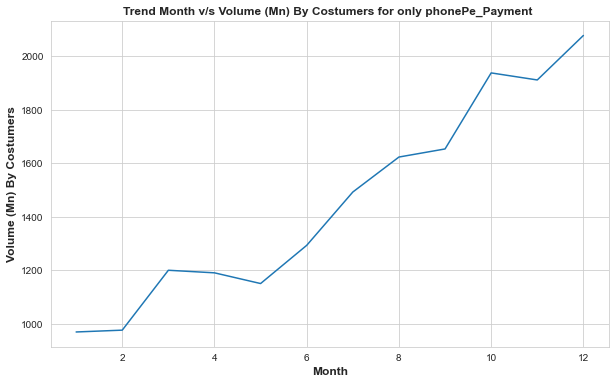

In [30]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.lineplot(x='Month',y='Volume (Mn) By Costumers',data =phonePe_Payment)
plt.xlabel('Month',fontweight='bold',size = 12) 
plt.ylabel('Volume (Mn) By Costumers',fontweight='bold',size = 12) 
plt.title("Trend Month v/s Volume (Mn) By Costumers for only phonePe_Payment ",fontweight='bold',size = 12)
plt.show()

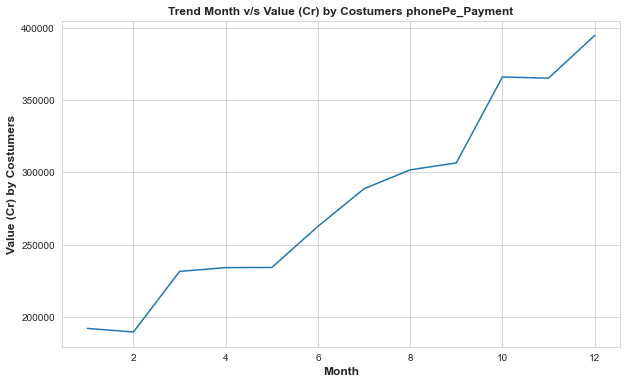

In [31]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.lineplot(x='Month',y='Value (Cr) by Costumers',data =phonePe_Payment)
plt.xlabel('Month',fontweight='bold',size = 12) 
plt.ylabel('Value (Cr) by Costumers',fontweight='bold',size = 12) 
plt.title("Trend Month v/s Value (Cr) by Costumers phonePe_Payment",fontweight='bold',size = 12)
plt.show()

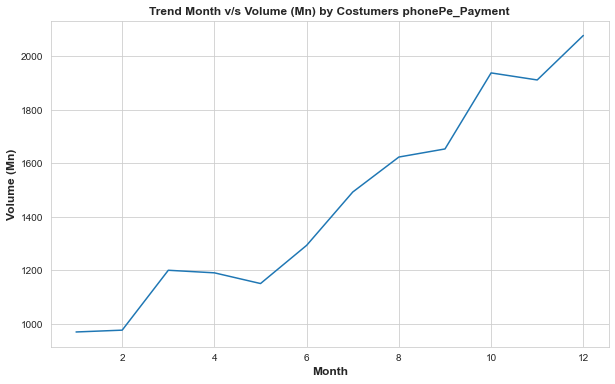

In [32]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.lineplot(x='Month',y='Volume (Mn)',data =phonePe_Payment)
plt.xlabel('Month',fontweight='bold',size = 12) 
plt.ylabel('Volume (Mn)',fontweight='bold',size = 12) 
plt.title("Trend Month v/s Volume (Mn) by Costumers phonePe_Payment",fontweight='bold',size = 12)
plt.show()

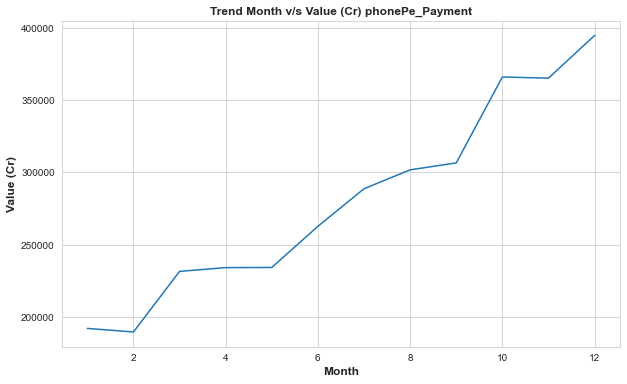

In [33]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.lineplot(x='Month',y='Value (Cr)',data =phonePe_Payment)
plt.xlabel('Month',fontweight='bold',size = 12) 
plt.ylabel('Value (Cr)',fontweight='bold',size = 12) 
plt.title("Trend Month v/s Value (Cr) phonePe_Payment",fontweight='bold',size = 12)
plt.show()

<h1>Thank you</h1>


![](https://c.tenor.com/DNcloOrW8q8AAAAC/thank-you.gif)